# Import des librairies

In [1]:
# fonctions statistiques
import scipy.stats as st

# algèbre linéaire
import numpy as np 

# traitement des données
import pandas as pd

# graphiques et visualisation des données
import seaborn as sns
sns.set_theme(style="whitegrid") # style graphique des visualisations
%matplotlib inline
import matplotlib.pyplot as plt

# identification des types de données
from pandas.api.types import is_string_dtype, is_numeric_dtype

# Chargement des données

In [2]:
path = 'data/openfoodfacts_data_for_analysis.csv'

In [3]:
open_food_facts_df = pd.read_csv(path, sep="\t")

# Exploration préliminaire des données

In [17]:
open_food_facts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104300 entries, 0 to 104299
Data columns (total 10 columns):
Unnamed: 0          104300 non-null int64
brands_tags         103844 non-null object
labels_en           71866 non-null object
additives_tags      73811 non-null object
nutriscore_grade    104300 non-null object
pnns_groups_1       104159 non-null object
pnns_groups_2       104300 non-null object
additives_n         104300 non-null float64
nutriscore_score    104300 non-null float64
nova_group          104067 non-null float64
dtypes: float64(3), int64(1), object(6)
memory usage: 8.0+ MB


L'index apparaît comme une variable dans le jeu de données exporté. Il sera supprimé car un nouvel index est créé lors du chargement.

In [4]:
open_food_facts_df.drop(columns=['Unnamed: 0'], inplace=True)

In [19]:
open_food_facts_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104300 entries, 0 to 104299
Data columns (total 9 columns):
brands_tags         103844 non-null object
labels_en           71866 non-null object
additives_tags      73811 non-null object
nutriscore_grade    104300 non-null object
pnns_groups_1       104159 non-null object
pnns_groups_2       104300 non-null object
additives_n         104300 non-null float64
nutriscore_score    104300 non-null float64
nova_group          104067 non-null float64
dtypes: float64(3), object(6)
memory usage: 45.1 MB


In [5]:
open_food_facts_df.describe(include='all')

,brands_tags,labels_en,additives_tags,nutriscore_grade,pnns_groups_1,pnns_groups_2,additives_n,nutriscore_score,nova_group
count,103844,71866,73811,104300,104159,104300,104300.000000,104300.000000,104067.000000
unique,17089,21046,19093,5,13,45,NaN,NaN,NaN
top,u,Green Dot,"en:e322,en:e322i",d,Sugary snacks,Biscuits and cakes,NaN,NaN,NaN
freq,3576,4116,3834,30566,22711,11070,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.140489,9.488926,3.512872
std,NaN,NaN,NaN,NaN,NaN,NaN,2.476332,8.933405,0.875439
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-14.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,10.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,16.000000,4.000000


Le jeu de données contient des données manquantes parmi les variables *brands_tags*, *labels_en*, *additives_tags*, *pnns_groups_1* et *nova_group*.

Nous allons les visualiser ci-dessus :

In [18]:
nombres_donnees_manquantes = open_food_facts_df.isnull().sum()
nombres_donnees_totales = open_food_facts_df.isnull().count()
pourcentages_donnees_manquantes = round(nombres_donnees_manquantes/nombres_donnees_totales*100, 1)

donnees_manquantes_df = pd.DataFrame({'nombre': nombres_donnees_manquantes, 
                                      'total': nombres_donnees_totales, 
                                      'pourcentage': pourcentages_donnees_manquantes})

donnees_manquantes_df.sort_values(by=['nombre'], ascending=False, inplace=True)

donnees_manquantes_df

,nombre,total,pourcentage
labels_en,32434,104300,31.1
additives_tags,30489,104300,29.2
brands_tags,456,104300,0.4
nova_group,233,104300,0.2
nova_group_classes,233,104300,0.2
pnns_groups_1,141,104300,0.1
nutriscore_grade,0,104300,0.0
pnns_groups_2,0,104300,0.0
additives_n,0,104300,0.0
nutriscore_score,0,104300,0.0


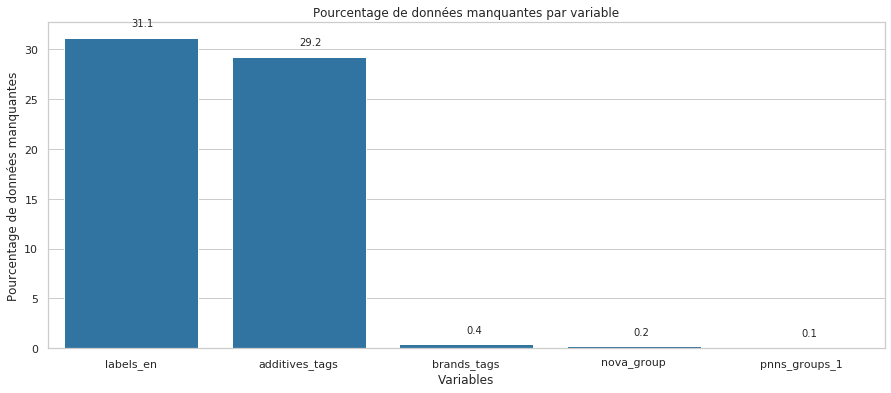

In [21]:
donnees_manquantes_df = donnees_manquantes_df[donnees_manquantes_df['nombre'] > 0]

plt.rcParams["figure.figsize"] = (15, 6)
sns.barplot(x=donnees_manquantes_df.index.values, y='pourcentage', data=donnees_manquantes_df, color='tab:blue')
plt.title('Pourcentage de données manquantes par variable')
plt.ylabel('Pourcentage de données manquantes')
plt.xlabel('Variables')

for variable, pourcentage in enumerate(donnees_manquantes_df.pourcentage):
    plt.text(variable, pourcentage, str(pourcentage)+"\n")

Les variables contenant une plus grande proportion de données manquantes sont *labels_en* et *additives_tags*, avec chacune 31.1% et 29.2% de données manquantes.

Il faudra porter une attention particulière lors de l'imputation de ces variables car la nouvelle valeur représentera environ 30% des données.

In [13]:
open_food_facts_df.head(12)

,brands_tags,labels_en,additives_tags,nutriscore_grade,pnns_groups_1,pnns_groups_2,additives_n,nutriscore_score,nova_group
0,crousresto,NaN,"en:e14xx,en:e262,en:e262i,en:e326",a,Cereals and potatoes,Bread,3.0,-4.0,4.0
1,comme-j-aime,"fr:viande-francaise,Made in France","en:e14xx,en:e451,en:e451i",b,Composite foods,One-dish meals,2.0,0.0,4.0
2,comme-j-aime,Green Dot,"en:e102,en:e110,en:e407,en:e471",b,Milk and dairy products,Dairy desserts,4.0,2.0,4.0
3,mx3,Green Dot,"en:e322,en:e322i",b,Fruits and vegetables,Fruits,1.0,1.0,4.0
4,"wonka,nerds","No artificial flavors,Contains GMOs","en:e102,en:e110,en:e129,en:e132,en:e133,en:e29...",d,Sugary snacks,Sweets,7.0,14.0,4.0
5,alice-delice,NaN,"en:e171,en:e339ii,en:e420,en:e420i,en:e422,en:...",d,unknown,unknown,5.0,15.0,4.0
6,alice-delice,Gluten-free,"en:e330,en:e415,en:e420,en:e420ii,en:e422,en:e471",d,Sugary snacks,Sweets,5.0,18.0,4.0
7,vichy,"Low or no sugar,Contains a source of phenylala...","en:e420,en:e951",c,Sugary snacks,Sweets,2.0,3.0,4.0
8,"m-m-s,mars,mars-chocolat",Contains GMOs,en:e414,e,Sugary snacks,Sweets,1.0,36.0,4.0
9,pepsi,NaN,"en:e150d,en:e338",e,Beverages,Sweetened beverages,2.0,13.0,4.0


In [6]:
# identification des types de variables
variables_numeriques = []
variables_qualitatives = []

for variable in open_food_facts_df:
    if is_numeric_dtype(open_food_facts_df[variable]):
        variables_numeriques.append(variable)
    elif is_string_dtype(open_food_facts_df[variable]):
        variables_qualitatives.append(variable)
        
print(variables_numeriques)
print(variables_qualitatives)

['additives_n', 'nutriscore_score', 'nova_group']
['brands_tags', 'labels_en', 'additives_tags', 'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2']


# Analyses univariées

Avant de réaliser les analyses, je vais d'abord modifier le type de donnée de *nova_group*.

In [7]:
open_food_facts_df = open_food_facts_df.astype({'nova_group': 'object'})

In [8]:
open_food_facts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104300 entries, 0 to 104299
Data columns (total 9 columns):
brands_tags         103844 non-null object
labels_en           71866 non-null object
additives_tags      73811 non-null object
nutriscore_grade    104300 non-null object
pnns_groups_1       104159 non-null object
pnns_groups_2       104300 non-null object
additives_n         104300 non-null float64
nutriscore_score    104300 non-null float64
nova_group          104067 non-null object
dtypes: float64(2), object(7)
memory usage: 7.2+ MB


## *Nova_group* : classification NOVA des produits

In [106]:
open_food_facts_df['nova_group'].value_counts()

4.0    71633
3.0    22792
1.0     8618
2.0     1024
Name: nova_group, dtype: int64

Text(0, 0.5, 'Nombre de produits')

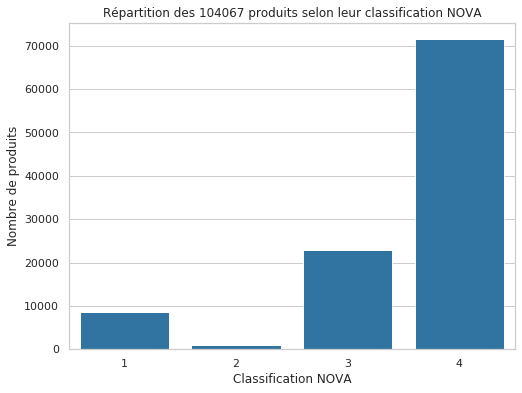

In [105]:
nombre_produits = open_food_facts_df['nova_group'].count()
plt.rcParams["figure.figsize"] = (8, 6)
sns.countplot(x='nova_group', data=open_food_facts_df, color='tab:blue', order=[1,2,3,4])
plt.title('Répartition des {} produits selon leur classification NOVA'.format(nombre_produits))
plt.xlabel('Classification NOVA')
plt.ylabel('Nombre de produits')

#for variable, pourcentage in enumerate(donnees_manquantes_df.pourcentage):
 #   plt.text(variable, pourcentage, str(pourcentage)+"\n")

La plupart des produits (environ 70%) sont ultra-transformés.

## *nutriscore_grade* : classement Nutri-Score des produits

In [107]:
open_food_facts_df['nutriscore_grade'].value_counts()

d    30566
c    23016
e    22130
a    14474
b    14114
Name: nutriscore_grade, dtype: int64

Text(0, 0.5, 'Nombre de produits')

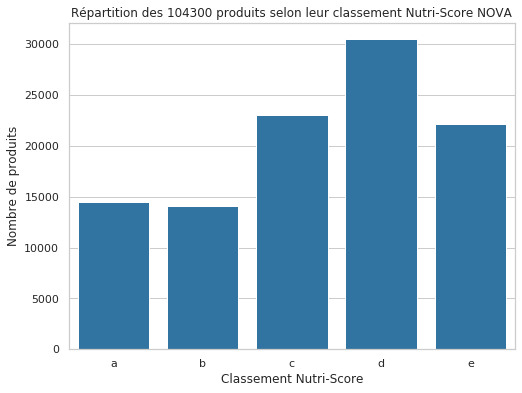

In [109]:
nombre_produits = open_food_facts_df['nutriscore_grade'].count()
plt.rcParams["figure.figsize"] = (8, 6)
sns.countplot(x='nutriscore_grade', data=open_food_facts_df, color='tab:blue', order=['a', 'b', 'c', 'd', 'e'])
plt.title('Répartition des {} produits selon leur classement Nutri-Score'.format(nombre_produits))
plt.xlabel('Classement Nutri-Score')
plt.ylabel('Nombre de produits')

#for variable, pourcentage in enumerate(donnees_manquantes_df.pourcentage):
 #   plt.text(variable, pourcentage, str(pourcentage)+"\n")

La plupart des produits ont un Nutri-Score moyen ou mauvais (environ 70%).

## *nutriscore_score* : score final Nutri-Score des produits

In [110]:
open_food_facts_df['nutriscore_score'].describe()

count    104300.000000
mean          9.488926
std           8.933405
min         -14.000000
25%           2.000000
50%          10.000000
75%          16.000000
max          40.000000
Name: nutriscore_score, dtype: float64

Text(-3.8249999999999957, 0.5, 'Nombre de produits')

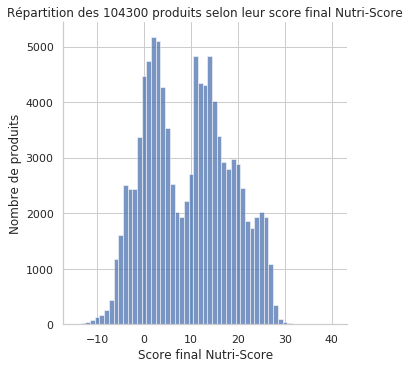

In [114]:
# Distribution du score final Nutri-Score
nombre_produits = open_food_facts_df['nutriscore_score'].count()
sns.displot(x='nutriscore_score', data=open_food_facts_df, discrete=True)
plt.title('Répartition des {} produits selon leur score final Nutri-Score'.format(nombre_produits))
plt.xlabel('Score final Nutri-Score')
plt.ylabel('Nombre de produits')

Text(0.5, 0, 'Score final Nutri-Score')

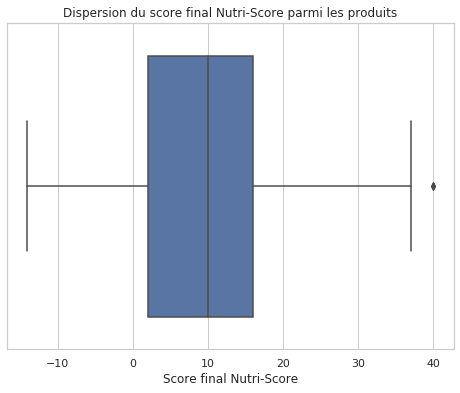

In [115]:
# Dispersion du score final Nutri-Score
sns.boxplot(x='nutriscore_score', data=open_food_facts_df)
plt.title('Dispersion du score final Nutri-Score parmi les produits')
plt.xlabel('Score final Nutri-Score')

Voyons quels produits sont les outliers sur leur score final du Nutri-Score.

In [116]:
open_food_facts_df[open_food_facts_df['nutriscore_score'] == 40]

,brands_tags,labels_en,additives_tags,nutriscore_grade,pnns_groups_1,pnns_groups_2,additives_n,nutriscore_score,nova_group
8012,cynxshno,NaN,en:e150d,e,Beverages,Unsweetened beverages,1.0,40.0,4
90646,body-attack,NaN,"en:e551,en:e950,en:e955",e,unknown,unknown,3.0,40.0,4


Le premier produit est une boisson de Pologne. Le deuxième un complément alimentaire de protéines.

## *additives_n* : nombre d'additifs des produits

In [117]:
open_food_facts_df['additives_n'].describe()

count    104300.000000
mean          2.140489
std           2.476332
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          30.000000
Name: additives_n, dtype: float64

Text(-10.824999999999996, 0.5, 'Nombre de produits')

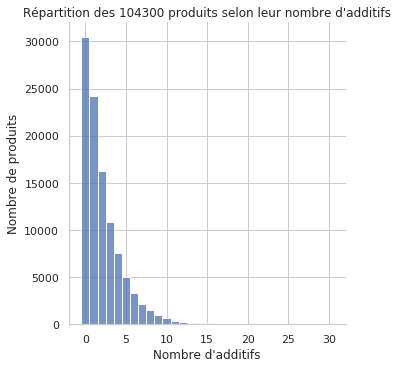

In [118]:
# Distribution du nombre d'additifs des produits
nombre_produits = open_food_facts_df['additives_n'].count()
sns.displot(x='additives_n', data=open_food_facts_df, discrete=True)
plt.title('Répartition des {} produits selon leur nombre d\'additifs'.format(nombre_produits))
plt.xlabel('Nombre d\'additifs')
plt.ylabel('Nombre de produits')

La plupart des produits n'ont aucun additif ou en ont très peu. Pour 75% d'entre eux, il y en a 3 au maximum.

Text(0.5, 0, "Nombre d'additifs")

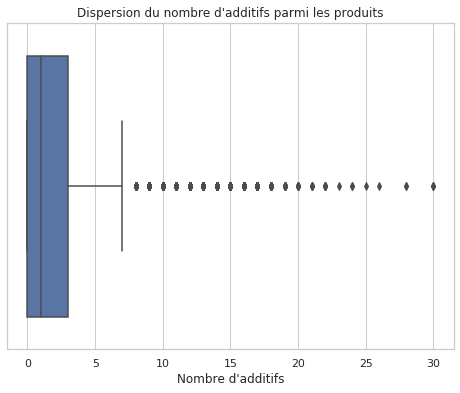

In [119]:
# Dispersion du nombre d'additifs des produits
sns.boxplot(x='additives_n', data=open_food_facts_df)
plt.title('Dispersion du nombre d\'additifs parmi les produits')
plt.xlabel('Nombre d\'additifs')

Voyons quels produits sont les outliers sur leur nombre d'additifs.

In [19]:
filtered_df = open_food_facts_df[open_food_facts_df['additives_n'] > 7]
filtered_df.sample(30)

,brands_tags,labels_en,additives_tags,nutriscore_grade,pnns_groups_1,pnns_groups_2,additives_n,nutriscore_score,nova_group
4737,chef-select-to-go,NaN,"en:e14xx,en:e160c,en:e161b,en:e202,en:e224,en:...",d,Composite foods,Sandwiches,14.0,11.0,4
37914,leader-price,NaN,"en:e14xx,en:e160c,en:e161b,en:e202,en:e260,en:...",e,Fat and sauces,Dressings and sauces,8.0,19.0,4
78633,poppies-berlidon,Made in France,"en:e14xx,en:e160a,en:e160c,en:e171,en:e202,en:...",e,Sugary snacks,Biscuits and cakes,14.0,20.0,4
14029,haribo,NaN,"en:e100,en:e131,en:e141,en:e141ii,en:e153,en:e...",d,Sugary snacks,Sweets,15.0,14.0,4
93069,winny,"Green Dot,Made in France,fr:eco-emballages","en:e14xx,en:e160,en:e262,en:e300,en:e322,en:e3...",c,Composite foods,One-dish meals,9.0,5.0,4
9656,"la-laitiere,nestle,secret-de-mousse","Green Dot,New,fr:eco-emballages,fr:nutritional...","en:e100,en:e14xx,en:e160a,en:e160ai,en:e171,en...",c,Milk and dairy products,Dairy desserts,14.0,7.0,4
81954,les-delices-des-7-vallees,NaN,"en:e14xx,en:e160a,en:e160b,en:e202,en:e300,en:...",d,sugary-snacks,pastries,9.0,17.0,4
102760,look-o-look,"FSC,FSC Mix,fr:fsc-c021442","en:e100,en:e120,en:e133,en:e150d,en:e153,en:e1...",d,Sugary snacks,Sweets,17.0,14.0,4
52734,monoprix,Green Dot,"en:e14xx,en:e160a,en:e250,en:e316,en:e331,en:e...",d,Composite foods,One-dish meals,8.0,12.0,4
21445,casino,NaN,"en:e160,en:e160b,en:e322,en:e322i,en:e330,en:e...",c,Milk and dairy products,Ice cream,8.0,10.0,4


In [58]:
st.skew(open_food_facts_df['additives_n'])

1.9621323603043257

La distribution du nombre d'additifs est totalement asymétrique, le coefficient de skewness valant 1.96 le confirme car il est positif. Il y aura besoin de transformer cette variable avec le log avant d'utiliser le dataset pour entraîner un modèle.

Voyons les stats des produits sans les outliers :

In [16]:
filtered_df = open_food_facts_df[open_food_facts_df['additives_n'] < 8]
filtered_df['additives_n'].describe()

count    99929.000000
mean         1.799508
std          1.833887
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          7.000000
Name: additives_n, dtype: float64

## *pnns_groups_1* : catégorie principale des produits

In [134]:
open_food_facts_df['pnns_groups_1'].value_counts()

Sugary snacks              22711
Composite foods            13098
Fish Meat Eggs             12689
Milk and dairy products    12460
Cereals and potatoes        8721
Beverages                   7807
Salty snacks                6897
unknown                     6141
Fruits and vegetables       6140
Fat and sauces              5396
sugary-snacks               1383
fruits-and-vegetables        712
cereals-and-potatoes           4
Name: pnns_groups_1, dtype: int64

Text(0.5, 0, 'Nombre de produits')

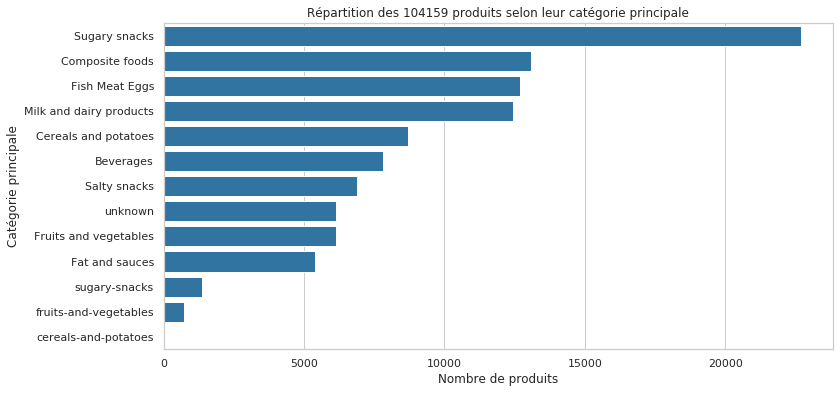

In [136]:
ordre_categorie = open_food_facts_df['pnns_groups_1'].value_counts().index
nombre_produits = open_food_facts_df['pnns_groups_1'].count()
plt.rcParams["figure.figsize"] = (12, 6)
sns.countplot(y='pnns_groups_1', data=open_food_facts_df, color='tab:blue', order=ordre_categorie)
plt.title('Répartition des {} produits selon leur catégorie principale'.format(nombre_produits))
plt.ylabel('Catégorie principale')
plt.xlabel('Nombre de produits')

#for variable, pourcentage in enumerate(donnees_manquantes_df.pourcentage):
 #   plt.text(variable, pourcentage, str(pourcentage)+"\n")

Les deux principales catégories représentées parmi les produits sont les snacks sucrés et les plats préparés. On peut remarquer que trois catégories sont doublonnées : *sugary-snacks*, *fruits-and-vegetables* et *cereals-and-potatoes*. Ces catégories devront être regroupées avec leur doublon.

On note également que les produits de bonne qualité nutritionnelle tels que les fruits, légumes et céréales sont peu représentés dans notre jeu de données.

Regroupons les catégories concernées.

In [9]:
open_food_facts_df['pnns_groups_1'].replace(['sugary-snacks', 'fruits-and-vegetables', 'cereals-and-potatoes'],
                                           ['Sugary snacks', 'Fruits and vegetables', 'Cereals and potatoes'],
                                           inplace=True)

In [10]:
open_food_facts_df['pnns_groups_1'].value_counts()

Sugary snacks              24094
Composite foods            13098
Fish Meat Eggs             12689
Milk and dairy products    12460
Cereals and potatoes        8725
Beverages                   7807
Salty snacks                6897
Fruits and vegetables       6852
unknown                     6141
Fat and sauces              5396
Name: pnns_groups_1, dtype: int64

Text(0.5, 0, 'Nombre de produits')

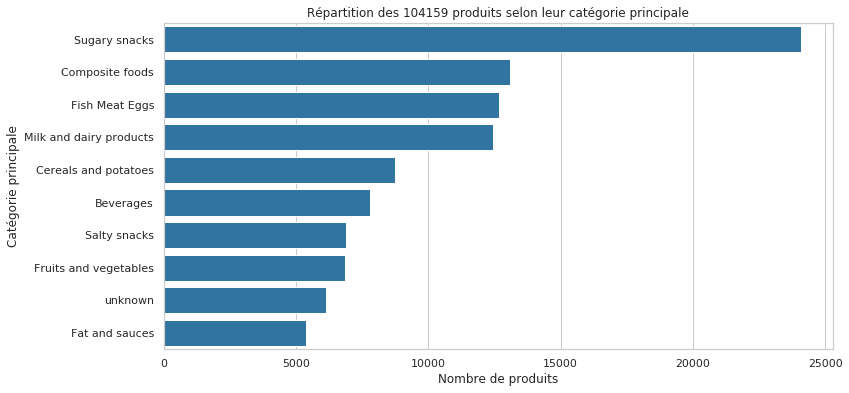

In [24]:
ordre_categorie = open_food_facts_df['pnns_groups_1'].value_counts().index
nombre_produits = open_food_facts_df['pnns_groups_1'].count()
plt.rcParams["figure.figsize"] = (12, 6)
sns.countplot(y='pnns_groups_1', data=open_food_facts_df, color='tab:blue', order=ordre_categorie)
plt.title('Répartition des {} produits selon leur catégorie principale'.format(nombre_produits))
plt.ylabel('Catégorie principale')
plt.xlabel('Nombre de produits')

## *pnns_groups_2* : catégorie secondaire des produits

In [137]:
open_food_facts_df['pnns_groups_2'].value_counts()

Biscuits and cakes                  11070
One-dish meals                      10693
Sweets                               8043
Processed meat                       6718
unknown                              6141
Dressings and sauces                 4356
Cheese                               4250
Milk and yogurt                      4144
Salty and fatty products             3621
Chocolate products                   3598
Cereals                              3502
Sweetened beverages                  3284
Meat                                 2775
Appetizers                           2700
Fish and seafood                     2647
Bread                                2322
Vegetables                           2291
Dairy desserts                       2215
Fruits                               2155
Ice cream                            1851
Breakfast cereals                    1512
Fruit juices                         1449
pastries                             1383
Pizza pies and quiche             

Text(0.5, 0, 'Nombre de produits')

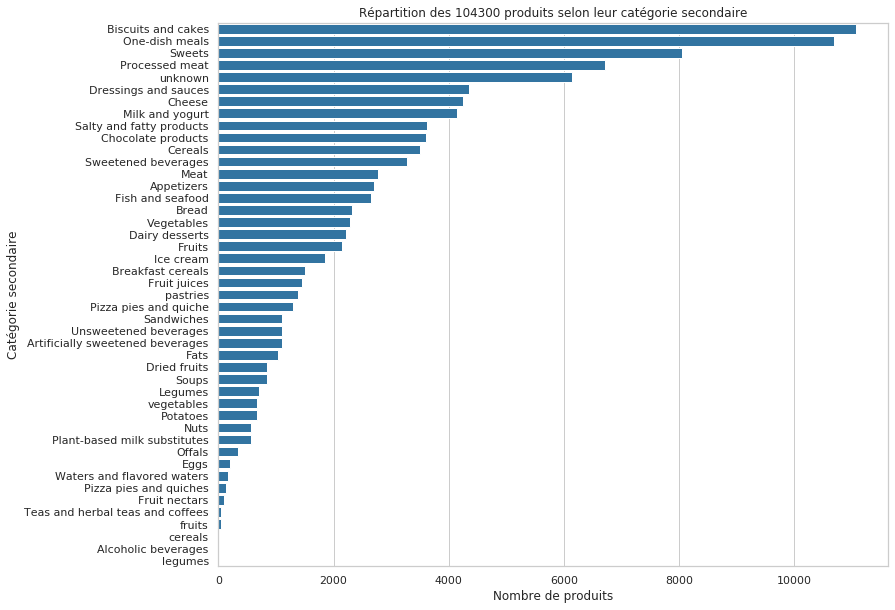

In [140]:
ordre_categorie = open_food_facts_df['pnns_groups_2'].value_counts().index
nombre_produits = open_food_facts_df['pnns_groups_2'].count()
plt.rcParams["figure.figsize"] = (12, 10)
sns.countplot(y='pnns_groups_2', data=open_food_facts_df, color='tab:blue', order=ordre_categorie)
plt.title('Répartition des {} produits selon leur catégorie secondaire'.format(nombre_produits))
plt.ylabel('Catégorie secondaire')
plt.xlabel('Nombre de produits')

#for variable, pourcentage in enumerate(donnees_manquantes_df.pourcentage):
 #   plt.text(variable, pourcentage, str(pourcentage)+"\n")

Les principales sous-catégories représentées parmi les produits sont les biscuits, gâteaux, plats préparés, bonbons et la viande transformée.

Les catégories qui pourront être rassemblées en une seule sont :
- *Vegetables*, *vegetables*, *legumes* et *Legumes* 
- *Fruits* et *fruits*
- *Cereals* et *cereals*
- *Pizza pies and quiche* et *Pizza pies and quiches*

Regroupons ces sous-catégories.

In [11]:
open_food_facts_df['pnns_groups_2'].replace(
                        ['fruits', 'legumes', 'Legumes', 'vegetables', 'cereals', 'Pizza pies and quiches'],
                        ['Fruits', 'Vegetables', 'Vegetables', 'Vegetables', 'Cereals', 'Pizza pies and quiche'],
                        inplace=True)

In [12]:
open_food_facts_df['pnns_groups_2'].value_counts()

Biscuits and cakes                  11070
One-dish meals                      10693
Sweets                               8043
Processed meat                       6718
unknown                              6141
Dressings and sauces                 4356
Cheese                               4250
Milk and yogurt                      4144
Vegetables                           3679
Salty and fatty products             3621
Chocolate products                   3598
Cereals                              3505
Sweetened beverages                  3284
Meat                                 2775
Appetizers                           2700
Fish and seafood                     2647
Bread                                2322
Dairy desserts                       2215
Fruits                               2195
Ice cream                            1851
Breakfast cereals                    1512
Fruit juices                         1449
Pizza pies and quiche                1433
pastries                          

Text(0.5, 0, 'Nombre de produits')

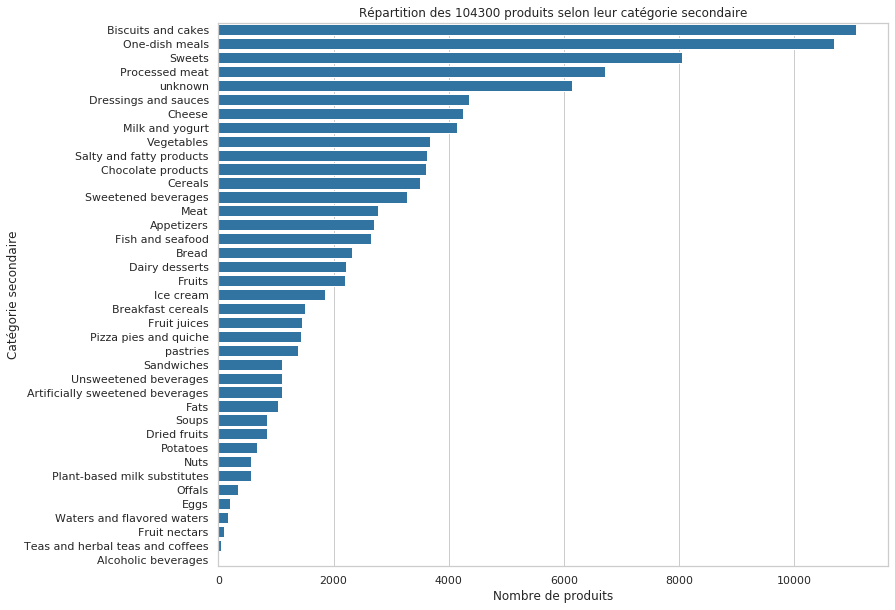

In [29]:
ordre_categorie = open_food_facts_df['pnns_groups_2'].value_counts().index
nombre_produits = open_food_facts_df['pnns_groups_2'].count()
plt.rcParams["figure.figsize"] = (12, 10)
sns.countplot(y='pnns_groups_2', data=open_food_facts_df, color='tab:blue', order=ordre_categorie)
plt.title('Répartition des {} produits selon leur catégorie secondaire'.format(nombre_produits))
plt.ylabel('Catégorie secondaire')
plt.xlabel('Nombre de produits')

## *brands_tags* : marque des produits

In [33]:
open_food_facts_df['brands_tags'].value_counts().head(30)

u                            3576
auchan                       3107
carrefour                    2965
casino                       2035
leader-price                 1688
picard                       1325
cora                         1116
fleury-michon                 799
netto                         782
monoprix                      721
belle-france                  716
la-vie-claire                 669
franprix                      631
le-gaulois                    532
thiriet                       506
bio-village,marque-repere     446
u-saveurs,u                   397
u-bio,u                       383
nestle                        369
dia                           330
monique-ranou                 327
sans-marque                   322
bjorg                         321
casino-bio,casino             285
yoplait                       284
haribo                        278
andros                        276
paturages                     271
knorr                         264
bonduelle     

La plupart des marques représentées sont des chaînes de la grande distribution ou des entreprises de l'agro-alimentaire. La variable peut donner aussi une indication sur le lieu d'achat du produit.

## *labels_en* : label portés par les produits

In [34]:
open_food_facts_df['labels_en'].value_counts().head(30)

Green Dot                                                                       4116
Made in France                                                                  3010
Organic                                                                         2244
Organic,EU Organic,AB Agriculture Biologique                                    1700
No preservatives                                                                1037
No colorings,No preservatives                                                    823
PDO                                                                              763
Gluten-free                                                                      750
Green Dot,Made in France                                                         718
No colorings                                                                     525
Green Dot,fr:eco-emballages                                                      501
Palm-oil-free                                                    

In [35]:
open_food_facts_df['labels_en'].str.find("preservatives").describe()

count    71866.000000
mean         2.875059
std         15.074944
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        283.000000
Name: labels_en, dtype: float64

In [37]:
open_food_facts_df[open_food_facts_df['labels_en'].str.find("preservatives") > -1]

,brands_tags,labels_en,additives_tags,nutriscore_grade,pnns_groups_1,pnns_groups_2,additives_n,nutriscore_score,nova_group
10,heinz,"Vegetarian,No artificial colors,No flavors,No ...","en:e101,en:e101i",d,Fat and sauces,Dressings and sauces,1.0,14.0,4
18,heinz,"No preservatives,No thickening agent",NaN,d,Fat and sauces,Dressings and sauces,0.0,13.0,3
31,genius,"Gluten-free,No preservatives","en:e422,en:e464",b,Cereals and potatoes,Bread,2.0,0.0,4
99,liebig,"Cooked in France,No colorings,No preservatives",en:e14xx,c,Fruits and vegetables,Soups,1.0,3.0,4
201,koon-chun,No preservatives,en:e401,c,Fat and sauces,Dressings and sauces,1.0,6.0,4
...,...,...,...,...,...,...,...,...,...
104270,yeo-s,No preservatives,"en:e407,en:e452,en:e471,en:e500",b,Beverages,Plant-based milk substitutes,4.0,0.0,4
104275,pa-food,"Vegetarian,Halal,Vegan,No cholesterol,No prese...",NaN,b,Cereals and potatoes,Bread,0.0,2.0,3
104279,kawan,No preservatives,en:e500,c,Cereals and potatoes,Bread,1.0,10.0,3
104280,marigold,"FSC,No-preservativeshalal","en:e296,en:e330,en:e466",b,unknown,unknown,3.0,2.0,4


In [38]:
open_food_facts_df['labels_en'].str.find("additives").describe()

count    71866.000000
mean        -0.503326
std          5.985629
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        222.000000
Name: labels_en, dtype: float64

In [39]:
open_food_facts_df[open_food_facts_df['labels_en'].str.find("additives") > -1]

,brands_tags,labels_en,additives_tags,nutriscore_grade,pnns_groups_1,pnns_groups_2,additives_n,nutriscore_score,nova_group
125,thai-kitchen,No additives,NaN,d,Beverages,Plant-based milk substitutes,0.0,11.0,1
261,lily-of-the-desert,"Organic,No additives,No preservatives",en:e330,b,Beverages,Unsweetened beverages,1.0,1.0,NaN
669,old-dominion,"Gluten-free,No additives,No preservatives",NaN,c,Salty snacks,Nuts,0.0,3.0,3
877,thomas-brioche,"No colorings,No preservatives,No additives",NaN,d,Sugary snacks,pastries,0.0,17.0,4
978,carrefour,No additives,NaN,e,Sugary snacks,Biscuits and cakes,0.0,21.0,4
...,...,...,...,...,...,...,...,...,...
103258,vivera,"No additives,With Sunflower oil",NaN,a,unknown,unknown,0.0,-5.0,4
103336,body-fit,"Low or no salt,Organic,EU Organic,EU/non-EU Ag...",NaN,a,Sugary snacks,Sweets,0.0,-2.0,1
104222,meadow-fresh,"No additives,No preservatives",NaN,b,unknown,unknown,0.0,1.0,1
104225,mother-earth,No additives,NaN,d,Cereals and potatoes,Vegetables,0.0,14.0,4


Au vu de la grande diversité des labels présents sur les produits. Tous ne seront pas utiles pour l'analyse et l'application, il sera intéressant de travailler sur les labels de type "No additives" ou "No preservatives".

## *additives_tags* : liste d'additifs présents dans les produits

In [43]:
open_food_facts_df['additives_tags'].value_counts().head(30)

en:e322,en:e322i                      3834
en:e330                               2802
en:e440                               2540
en:e14xx                              1969
en:e300                               1870
en:e250,en:e301                       1248
en:e300,en:e330                        912
en:e250                                818
en:e407                                812
en:e250,en:e316                        748
en:e330,en:e440                        745
en:e415                                593
en:e252                                571
en:e412                                502
en:e202                                493
en:e471                                487
en:e412,en:e415                        458
en:e14xx,en:e415                       393
en:e160c                               357
en:e160b                               330
en:e500,en:e500ii                      323
en:e224,en:e330                        306
en:e270                                284
en:e250,en:

# Analyses multivariées

In [25]:
open_food_facts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104300 entries, 0 to 104299
Data columns (total 9 columns):
brands_tags         103844 non-null object
labels_en           71866 non-null object
additives_tags      73811 non-null object
nutriscore_grade    104300 non-null object
pnns_groups_1       104159 non-null object
pnns_groups_2       104300 non-null object
additives_n         104300 non-null float64
nutriscore_score    104300 non-null float64
nova_group          104067 non-null object
dtypes: float64(2), object(7)
memory usage: 7.2+ MB


## Y a-t-il plus d'additifs lorsque les produits ont une faible qualité nutritionnelle ?

Text(0.5, 0, "Nombre d'additifs")

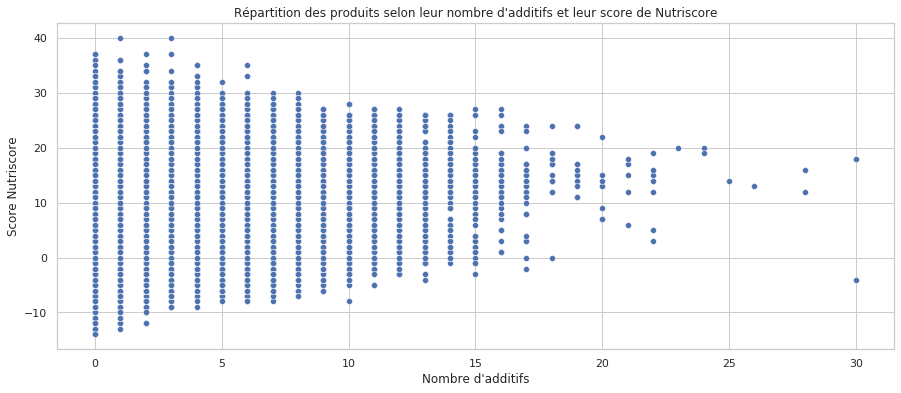

In [28]:
sns.scatterplot(data=open_food_facts_df, x="additives_n", y="nutriscore_score")
plt.title('Répartition des produits selon leur nombre d\'additifs et leur score de Nutriscore')
plt.ylabel('Score Nutriscore')
plt.xlabel('Nombre d\'additifs')

In [26]:
open_food_facts_df.corr()

,additives_n,nutriscore_score
additives_n,1.00000,0.18417
nutriscore_score,0.18417,1.00000


Il ne semble pas avoir de corrélation entre le nombre d'additifs et le score Nutriscore.

Considérons plutôt ces variables comme qualitatives pour vérifier leur indépendance entre elles. Dressons alors le tableau de contingence.

In [31]:
X = "additives_n"
Y = "nutriscore_score"
tableau_contingence = open_food_facts_df[[X, Y]].pivot_table(index=X, 
                                                             columns=Y, 
                                                             aggfunc=len, 
                                                             margins=True,
                                                             margins_name="Total")

tableau_contingence

nutriscore_score,-14.0,-13.0,-12.0,-11.0,-10.0,-9.0,-8.0,-7.0,-6.0,-5.0,...,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,40.0,Total
additives_n,,,,,,,,,,,,,,,,,,,,,
0.0,4.0,15.0,41.0,69.0,107.0,147.0,211.0,334.0,891.0,926.0,...,6.0,6.0,4.0,4.0,1.0,1.0,3.0,2.0,NaN,30489
1.0,NaN,1.0,3.0,4.0,13.0,15.0,24.0,58.0,164.0,350.0,...,12.0,9.0,5.0,2.0,3.0,NaN,3.0,NaN,1.0,24228
2.0,NaN,NaN,2.0,NaN,4.0,4.0,14.0,27.0,71.0,224.0,...,12.0,3.0,1.0,NaN,2.0,2.0,NaN,1.0,NaN,16296
3.0,NaN,NaN,NaN,NaN,NaN,3.0,7.0,10.0,20.0,46.0,...,1.0,3.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,10879
4.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,8.0,38.0,...,5.0,4.0,1.0,2.0,NaN,2.0,NaN,NaN,NaN,7521
5.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,13.0,9.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5006
6.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,5.0,8.0,...,2.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,3318
7.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,3.0,9.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2192
8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1513


Au vu du tableau de contingence, il est préférable de créer des classes pour la variable 'nombre d'additifs' et d'utiliser la classe du nutriscore au lieu du score.

Création des classes du nombre d'additifs :

In [13]:
open_food_facts_df.loc[open_food_facts_df['additives_n'] == 0, 'additives_n_classes'] = 'Pas d\'additif'
open_food_facts_df.loc[(open_food_facts_df['additives_n'] == 1) | (open_food_facts_df['additives_n'] == 2), 
                   'additives_n_classes'] = '1 ou 2 additifs'
open_food_facts_df.loc[(open_food_facts_df['additives_n'] >= 3) & (open_food_facts_df['additives_n'] <= 7), 
                   'additives_n_classes'] = 'Entre 3 et 7 additifs'
open_food_facts_df.loc[open_food_facts_df['additives_n'] > 7, 'additives_n_classes'] = 'Plus de 7 additifs'

In [37]:
open_food_facts_df[['additives_n', 'additives_n_classes']].sample(30)

,additives_n,additives_n_classes
6050,0.0,Pas d'additif
79960,4.0,Entre 3 et 7 additifs
32538,1.0,1 ou 2 additifs
21968,0.0,Pas d'additif
62006,3.0,Entre 3 et 7 additifs
101707,1.0,1 ou 2 additifs
74059,4.0,Entre 3 et 7 additifs
60678,2.0,1 ou 2 additifs
71369,0.0,Pas d'additif
82993,1.0,1 ou 2 additifs


In [40]:
open_food_facts_df['additives_n'].value_counts()

0.0     30489
1.0     24228
2.0     16296
3.0     10879
4.0      7521
5.0      5006
6.0      3318
7.0      2192
8.0      1513
9.0       999
10.0      657
11.0      365
12.0      263
13.0      173
14.0      151
15.0       96
16.0       52
17.0       37
18.0       22
19.0       13
20.0        8
22.0        7
21.0        5
30.0        3
24.0        2
28.0        2
26.0        1
23.0        1
25.0        1
Name: additives_n, dtype: int64

In [41]:
open_food_facts_df['additives_n_classes'].value_counts()

1 ou 2 additifs          40524
Pas d'additif            30489
Entre 3 et 7 additifs    28916
Plus de 7 additifs        4371
Name: additives_n_classes, dtype: int64

In [44]:
open_food_facts_df['additives_n_classes'].index

RangeIndex(start=0, stop=104300, step=1)

Text(0, 0.5, 'Score Nutri-Score')

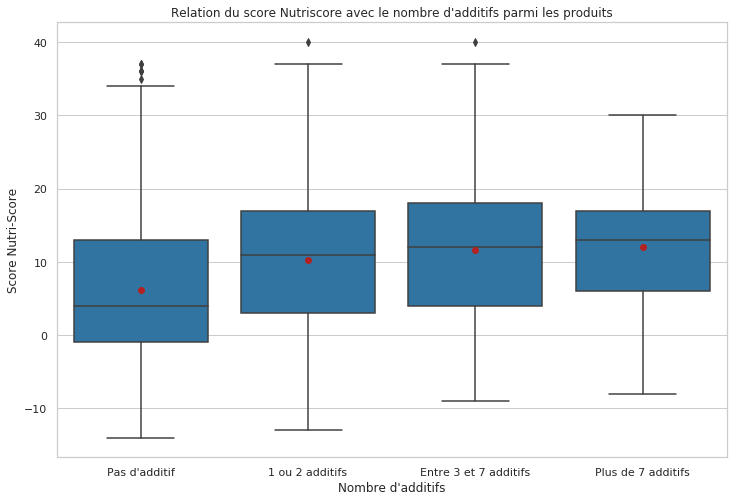

In [70]:
meanprops = {'marker':'o', 'markeredgecolor':'firebrick',
            'markerfacecolor':'firebrick'}

plt.rcParams["figure.figsize"] = (12, 8)
sns.boxplot(x='additives_n_classes', y='nutriscore_score', 
            data=open_food_facts_df, color='tab:blue',
            order=['Pas d\'additif', '1 ou 2 additifs', 'Entre 3 et 7 additifs', 'Plus de 7 additifs'],
            showmeans=True,
            meanprops=meanprops)
plt.title('Relation du score Nutriscore avec le nombre d\'additifs parmi les produits')
plt.xlabel('Nombre d\'additifs')
plt.ylabel('Score Nutri-Score')

Le score moyen et médian est plus faible parmi les produits sans additif. Il semble donc que ces produits aient une meilleure qualité nutritionnelle.

Confirmons-le avec une ANOVA en commençant par vérifier les hypothèses suivantes :
- chaque classe *k* doit suivre une loi normale de moyenne m*k* et de variance v
- chaque classe doit avoir la même variance v

*Classe 'Pas d\'additif'*

Text(-3.8249999999999957, 0.5, 'Nombre de produits')

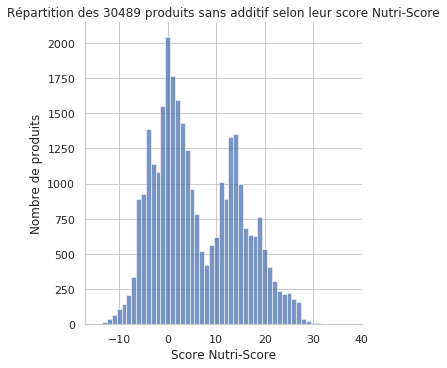

In [57]:
# Distribution du score final Nutri-Score parmi la classe 'Pas d'additifs'
filtered_data = open_food_facts_df[open_food_facts_df['additives_n_classes'] == 'Pas d\'additif']
nombre_produits = filtered_data['nutriscore_score'].count()
sns.displot(x='nutriscore_score', data=filtered_data, discrete=True)
plt.title('Répartition des {} produits sans additif selon leur score Nutri-Score'.format(nombre_produits))
plt.xlabel('Score Nutri-Score')
plt.ylabel('Nombre de produits')

In [61]:
filtered_data['nutriscore_score'].describe()

count    30489.000000
mean         6.094198
std          8.751638
min        -14.000000
25%         -1.000000
50%          4.000000
75%         13.000000
max         37.000000
Name: nutriscore_score, dtype: float64

In [59]:
st.skew(filtered_data['nutriscore_score'])

0.40242696396146305

In [60]:
st.kurtosis(filtered_data['nutriscore_score'])

-0.7744059261756844

Graphiquement, la distribution est bimodale et ne semble pas suivre une loi normale, cependant le skewness et le kurtosis sont proches de 0. Testons avec un test d'Agostino si cette classe suit la loi normale.

In [64]:
st.normaltest(filtered_data['nutriscore_score'])

NormaltestResult(statistic=3057.6414829337646, pvalue=0.0)

Au niveau de test 5%, nous rejetons l'hypothèse affirmant que la distribution suit une loi normale.

La première hypothèse citée ci-avant pour réaliser l'ANOVA n'est pas vérifiée. De ce fait, nous allons utiliser la variable 'nutriscore_grade' pour pouvoir répondre à l'interrogation. Ceci étant posé nous allons calculer le tableau de contingence.

In [66]:
X = 'nutriscore_grade'
Y = 'additives_n_classes'

tableau_contingence = open_food_facts_df[[X, Y]].pivot_table(index=X, 
                                                             columns=Y, 
                                                             aggfunc=len)

tableau_contingence

additives_n_classes,1 ou 2 additifs,Entre 3 et 7 additifs,Pas d'additif,Plus de 7 additifs
nutriscore_grade,,,,
a,4875,1629,7800,170
b,5028,3423,5246,417
c,9482,6392,6280,862
d,10812,10077,7568,2109
e,10327,7395,3595,813


Testons alors l'indépendance entre ces deux variables avec le test du khi-deux.

In [67]:
st.chi2_contingency(tableau_contingence)

(8408.717208004593,
 0.0,
 12,
 array([[ 5623.62776606,  4012.75344199,  4231.04301055,   606.5757814 ],
        [ 5483.7558581 ,  3912.9474976 ,  4125.80772771,   591.48891659],
        [ 8942.47731544,  6380.92671141,  6728.04241611,   964.55355705],
        [11875.90205177,  8474.07915628,  8935.0601534 ,  1280.95863854],
        [ 8598.23700863,  6135.29319271,  6469.04669223,   927.42310642]]))

À 5%, nous rejetons l'hypothèse nulle affirmant que les variables 'nutriscore_grade' et 'additives_n_classes' sont indépendantes. Par conséquent, il y a une dépendance significative entre le nombre d'additifs présents dans les produits et leur qualité nutritionnelle.

Text(0, 0.5, "Nombre d'additifs")

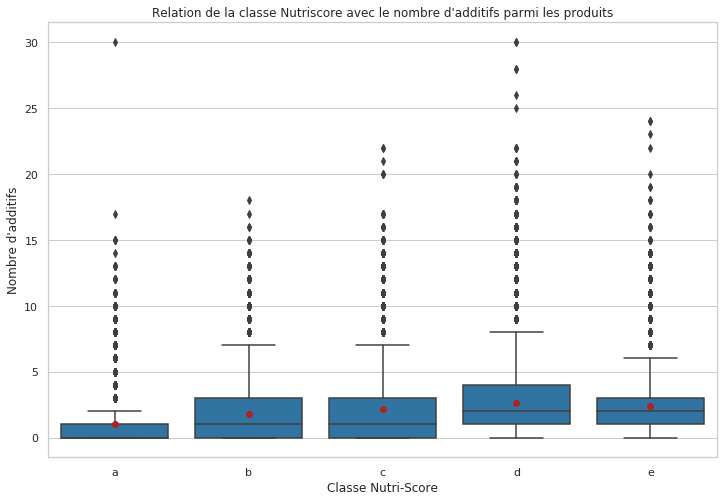

In [75]:
meanprops = {'marker':'o', 'markeredgecolor':'firebrick',
            'markerfacecolor':'firebrick'}

plt.rcParams["figure.figsize"] = (12, 8)
sns.boxplot(x='nutriscore_grade', y='additives_n', 
            data=open_food_facts_df, color='tab:blue',
            order=['a', 'b', 'c', 'd', 'e'],
            showmeans=True,
            meanprops=meanprops)
plt.title('Relation de la classe Nutriscore avec le nombre d\'additifs parmi les produits')
plt.xlabel('Classe Nutri-Score')
plt.ylabel('Nombre d\'additifs')

On observe des nombres d'additifs moyen et médian plus faible dans les classes de produits de meilleure qualité nutritionnelle. Voyons si cette différence est significative avec une ANOVA.

Vérifions d'abord les hypothèses nécessaires à l'ANOVA.

*Classe a*

Text(-3.8249999999999957, 0.5, 'Nombre de produits de classe a')

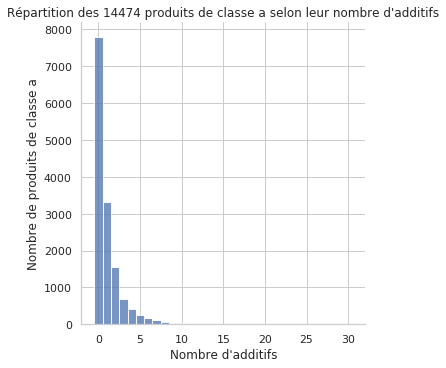

In [81]:
# Distribution du nombre d'additifs parmi la classe a des produits
filtered_data = open_food_facts_df[open_food_facts_df['nutriscore_grade'] == 'a']
nombre_produits = filtered_data['additives_n'].count()
sns.displot(x='additives_n', data=filtered_data, discrete=True)
plt.title('Répartition des {} produits de classe a selon leur nombre d\'additifs'.format(nombre_produits))
plt.xlabel('Nombre d\'additifs')
plt.ylabel('Nombre de produits de classe a')

In [85]:
st.normaltest(filtered_data['additives_n'])

NormaltestResult(statistic=9653.887174156096, pvalue=0.0)

La distribution ne suit donc pas une loi normale avec un risque de 5%. L'ANOVA n'est donc pas faisable.

**Conclusion de cette hypothèse :** selon les résultats empiriques, il semblerait que plus nous avons un nombre d'additifs faible dans les produits et meilleure est la qualité nutritionnelle des produits. Cependant, cela n'est pas significatif car les hypothèses du test d'ANOVA n'ont pas été vérifiées et donc cela n'a pas pu être testé.
En revanche, il y a une dépendance significative entre le nombre d'additifs et la qualité nutritionnelle.

In [90]:
open_food_facts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104300 entries, 0 to 104299
Data columns (total 10 columns):
brands_tags            103844 non-null object
labels_en              71866 non-null object
additives_tags         73811 non-null object
nutriscore_grade       104300 non-null object
pnns_groups_1          104159 non-null object
pnns_groups_2          104300 non-null object
additives_n            104300 non-null float64
nutriscore_score       104300 non-null float64
nova_group             104067 non-null object
additives_n_classes    104300 non-null object
dtypes: float64(2), object(8)
memory usage: 8.0+ MB


## Y a-t-il plus d'additifs dans les produits ultra-transformés ? Ou la présence d'additifs est-elle plus importante parmi ces produits ?

Text(0, 0.5, "Nombre d'additifs")

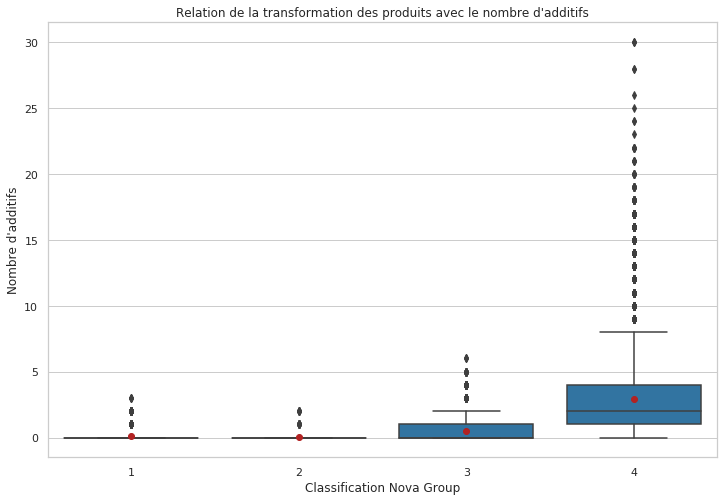

In [91]:
meanprops = {'marker':'o', 'markeredgecolor':'firebrick',
            'markerfacecolor':'firebrick'}

plt.rcParams["figure.figsize"] = (12, 8)
sns.boxplot(x='nova_group', y='additives_n', 
            data=open_food_facts_df, color='tab:blue',
            order=[1, 2, 3, 4],
            showmeans=True,
            meanprops=meanprops)
plt.title('Relation de la transformation des produits avec le nombre d\'additifs')
plt.xlabel('Classification Nova Group')
plt.ylabel('Nombre d\'additifs')

On peut voir que plus le produit est transformé et plus le nombre moyen d'additifs dans le produit est élevé. De plus, les produits avec les nombres d'additifs les plus élevés font partie des produits ultra-transformés.

Montrons que cette corrélation est significative avec un test du khi-2, en utilisant le nombre d'additifs regroupé par classe.

In [92]:
X = 'nova_group'
Y = 'additives_n_classes'

tableau_contingence = open_food_facts_df[[X, Y]].pivot_table(index=X, 
                                                             columns=Y, 
                                                             aggfunc=len)

tableau_contingence

additives_n_classes,1 ou 2 additifs,Entre 3 et 7 additifs,Pas d'additif,Plus de 7 additifs
nova_group,,,,
1.0,848.0,4.0,7766.0,NaN
2.0,22.0,NaN,1002.0,NaN
3.0,7196.0,538.0,15058.0,NaN
4.0,32239.0,28360.0,6663.0,4371.0


Regroupons les classes entre elles car les effectifs sont insuffisants pour un test du khi-2.
Voici les nouvelles classes :
- "Sans additif" et "Avec additifs"
- "Peu ou pas de transformation" et "Ultra-transformation"

In [14]:
open_food_facts_df.loc[(open_food_facts_df['nova_group'] == 1) | (open_food_facts_df['nova_group'] == 2) |
                       (open_food_facts_df['nova_group'] == 3), 
                       'nova_group_classes'] = 'Peu ou pas de transformation'
open_food_facts_df.loc[open_food_facts_df['nova_group'] == 4, 'nova_group_classes'] = 'Ultra transformation'
open_food_facts_df.loc[open_food_facts_df['additives_n'] == 0, 'additives_n_classes_k2'] = 'Sans additif'
open_food_facts_df.loc[open_food_facts_df['additives_n'] > 0, 'additives_n_classes_k2'] = 'Avec additif'

In [18]:
open_food_facts_df[['additives_n_classes', 'additives_n_classes_k2']].sample(30)

,additives_n_classes,additives_n_classes_k2
21177,Pas d'additif,Sans additif
28560,1 ou 2 additifs,Avec additif
72307,1 ou 2 additifs,Avec additif
35138,Entre 3 et 7 additifs,Avec additif
29499,Entre 3 et 7 additifs,Avec additif
75707,Entre 3 et 7 additifs,Avec additif
100043,Entre 3 et 7 additifs,Avec additif
72061,1 ou 2 additifs,Avec additif
76031,Entre 3 et 7 additifs,Avec additif
11635,1 ou 2 additifs,Avec additif


In [97]:
open_food_facts_df[['nova_group', 'nova_group_classes']].sample(30)

,nova_group,nova_group_classes
19979,4,Ultra transformation
4837,1,Peu ou pas de transformation
92764,3,Peu ou pas de transformation
39716,3,Peu ou pas de transformation
51299,4,Ultra transformation
102439,4,Ultra transformation
75924,4,Ultra transformation
31061,4,Ultra transformation
4449,1,Peu ou pas de transformation
6153,4,Ultra transformation


In [98]:
X = 'nova_group_classes'
Y = 'additives_n_classes_k2'

tableau_contingence = open_food_facts_df[[X, Y]].pivot_table(index=X, 
                                                             columns=Y, 
                                                             aggfunc=len)

tableau_contingence

additives_n_classes_k2,Avec additif,Sans additif
nova_group_classes,,
Peu ou pas de transformation,8608,23826
Ultra transformation,64970,6663


In [99]:
st.chi2_contingency(tableau_contingence)

(44362.075725243056, 0.0, 1, array([[22931.65798956,  9502.34201044],
        [50646.34201044, 20986.65798956]]))

Avec un risque de 5%, nous rejetons l'hypothèse déclarant que les variables 'nova_group_classes' et 'additives_n_classes_k2' sont indépendantes. Par conséquent, la transformation du produit et la présence d'additifs sont significativement corrélés.

**Conclusion de cette hypothèse :** la corrélation entre la transformation des produits et la présence d'additifs est significatif pour un risque de 5% (p-value = 0.0). Grâce aux résultats empiriques, on observe que plus un produit est transformé et plus le nombre d'additifs qu'il contient est élevé.

In [109]:
open_food_facts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104300 entries, 0 to 104299
Data columns (total 12 columns):
brands_tags               103844 non-null object
labels_en                 71866 non-null object
additives_tags            73811 non-null object
nutriscore_grade          104300 non-null object
pnns_groups_1             104159 non-null object
pnns_groups_2             104300 non-null object
additives_n               104300 non-null float64
nutriscore_score          104300 non-null float64
nova_group                104067 non-null object
additives_n_classes       104300 non-null object
nova_group_classes        104067 non-null object
additives_n_classes_k2    104300 non-null object
dtypes: float64(2), object(10)
memory usage: 9.5+ MB


## Y a-t-il plus d'additifs dans certaines catégories de produits ? Ou leur présence est-elle plus forte dans certaines d'entre elles ?

Text(0.5, 0, "Nombre d'additifs")

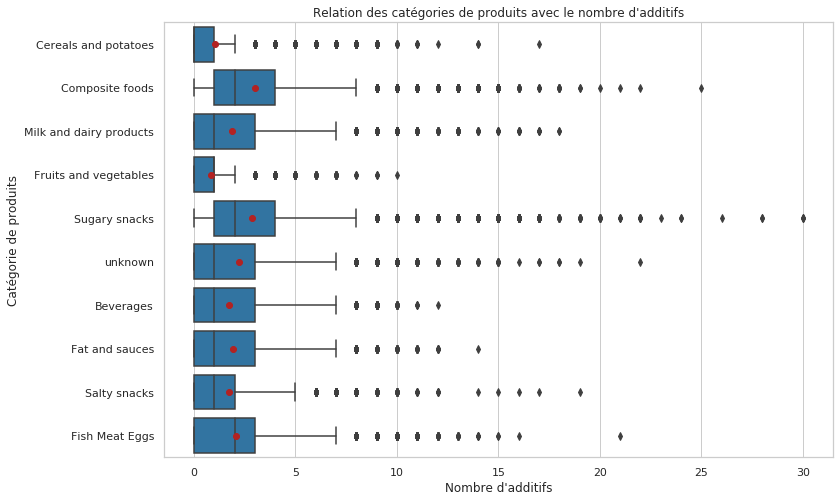

In [110]:
meanprops = {'marker':'o', 'markeredgecolor':'firebrick',
            'markerfacecolor':'firebrick'}

plt.rcParams["figure.figsize"] = (12, 8)
sns.boxplot(x='additives_n', y='pnns_groups_1', 
            data=open_food_facts_df, color='tab:blue',
            showmeans=True,
            meanprops=meanprops)
plt.title('Relation des catégories de produits avec le nombre d\'additifs')
plt.ylabel('Catégorie de produits')
plt.xlabel('Nombre d\'additifs')

Parmi les catégories "Plats préparés" et "Snacks sucrés", le nombre moyen et médian d'additifs est plus élevé que dans les autres catégories. De plus, la dispersion de ce nombre y sont plus fort.

Vérifions s'il y a une corrélation significative avec un test du khi-2 grâce aux classes créées.

In [111]:
X = 'pnns_groups_1'
Y = 'additives_n_classes'

tableau_contingence = open_food_facts_df[[X, Y]].pivot_table(index=X, 
                                                             columns=Y, 
                                                             aggfunc=len)

tableau_contingence

additives_n_classes,1 ou 2 additifs,Entre 3 et 7 additifs,Pas d'additif,Plus de 7 additifs
pnns_groups_1,,,,
Beverages,2869,2021,2786,131
Cereals and potatoes,2584,1245,4822,74
Composite foods,4488,4714,2702,1194
Fat and sauces,2129,1472,1694,101
Fish Meat Eggs,5177,3694,3458,360
Fruits and vegetables,3371,339,3135,7
Milk and dairy products,3746,3358,4969,387
Salty snacks,2943,1599,2250,105
Sugary snacks,10874,8619,2882,1719


In [112]:
st.chi2_contingency(tableau_contingence)

(12065.09679981136,
 0.0,
 27,
 array([[3033.26148485, 2161.486439  , 2285.23337398,  327.01870218],
        [3389.93293906, 2415.64867174, 2553.94661047,  365.47177872],
        [5088.97898405, 3626.38009197, 3833.99343312,  548.64749086],
        [2096.51325378, 1493.96449659, 1579.49523325,  226.02701639],
        [4930.06980674, 3513.14223447, 3714.27261206,  531.51534673],
        [2662.21438378, 1897.0801947 , 2005.68964756,  287.01577396],
        [4841.09620868, 3449.74010887, 3647.24066091,  521.92302153],
        [2679.69827859, 1909.53912768, 2018.86186503,  288.90072869],
        [9361.26581476, 6670.78958131, 7052.69795217, 1009.24665175],
        [2385.96884571, 1700.22905366, 1797.56861145,  257.23348918]]))

En effet, la corrélation entre le nombre d'additifs et la catégorie de produits est significative au seuil de 5% (p-value = 0.0). Faisons le même test avec la présence ou absence d'additifs.

In [113]:
X = 'pnns_groups_1'
Y = 'additives_n_classes_k2'

tableau_contingence = open_food_facts_df[[X, Y]].pivot_table(index=X, 
                                                             columns=Y, 
                                                             aggfunc=len)

tableau_contingence

additives_n_classes_k2,Avec additif,Sans additif
pnns_groups_1,,
Beverages,5021,2786
Cereals and potatoes,3903,4822
Composite foods,10396,2702
Fat and sauces,3702,1694
Fish Meat Eggs,9231,3458
Fruits and vegetables,3717,3135
Milk and dairy products,7491,4969
Salty snacks,4647,2250
Sugary snacks,21212,2882


In [114]:
st.chi2_contingency(tableau_contingence)

(8613.017633496876, 0.0, 9, array([[ 5521.76662602,  2285.23337398],
        [ 6171.05338953,  2553.94661047],
        [ 9264.00656688,  3833.99343312],
        [ 3816.50476675,  1579.49523325],
        [ 8974.72738794,  3714.27261206],
        [ 4846.31035244,  2005.68964756],
        [ 8812.75933909,  3647.24066091],
        [ 4878.13813497,  2018.86186503],
        [17041.30204783,  7052.69795217],
        [ 4343.43138855,  1797.56861145]]))

La corrélation est également significative au seuil de 5% (p-value = 0.0) entre la présence d'additifs et la catégorie de produits.

**Conclusion de cette hypothèse :** la corrélation entre la catégorie des produits et la présence d'additifs est significative pour un risque de 5% (p-value = 0.0) mais également entre la catégorie des produits et le nombre d'additifs. Empiriquement, les produits des catégories "Plats préparés" et "Snacks sucrés" ont un nombre moyen et médian plus élevés que dans les autres catégories.

## Y a-t-il plus d'additifs dans certaines sous-catégories de produits ? Ou leur présence est-elle plus forte dans certaines d'entre elles ?

Text(0.5, 0, "Nombre d'additifs")

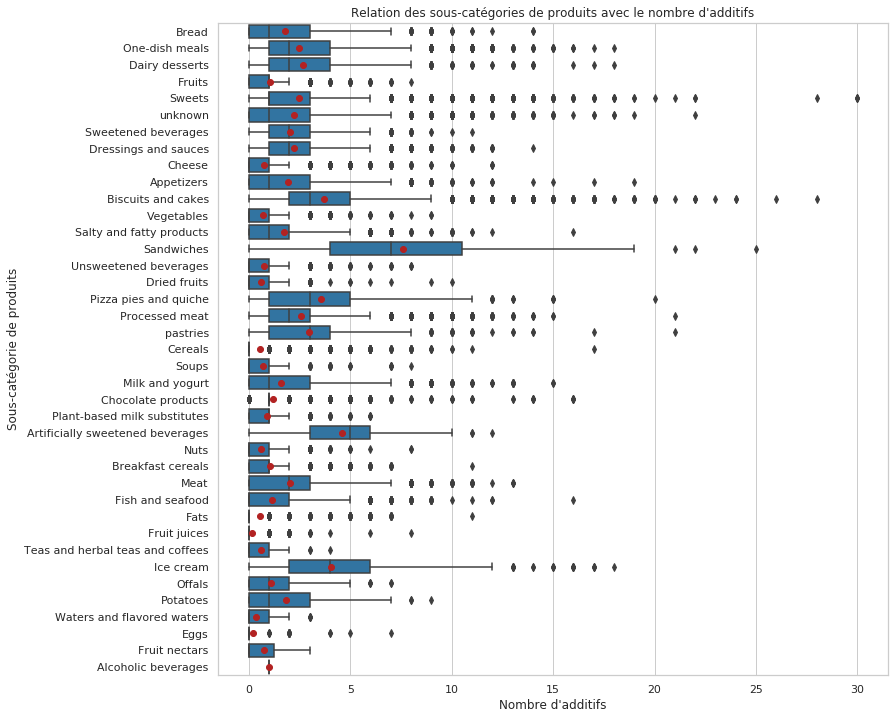

In [13]:
meanprops = {'marker':'o', 'markeredgecolor':'firebrick',
            'markerfacecolor':'firebrick'}

plt.rcParams["figure.figsize"] = (12, 12)
sns.boxplot(x='additives_n', y='pnns_groups_2', 
            data=open_food_facts_df, color='tab:blue',
            showmeans=True,
            meanprops=meanprops)
plt.title('Relation des sous-catégories de produits avec le nombre d\'additifs')
plt.ylabel('Sous-catégorie de produits')
plt.xlabel('Nombre d\'additifs')

Le nombre d'additifs moyen et médian sont plus élevés parmi les catégories "Glaces", "Boissons sucrées édulcorées", "Sandwichs", "Pâtisseries", "Pizzas, tartes et quiches" et "Biscuits et gâteaux".

Vérifions si cette dépendance est significative avec un test du khi-2.

In [17]:
X = 'pnns_groups_2'
Y = 'additives_n_classes'

tableau_contingence = open_food_facts_df[[X, Y]].pivot_table(index=X, 
                                                             columns=Y, 
                                                             aggfunc=len)

tableau_contingence

additives_n_classes,1 ou 2 additifs,Entre 3 et 7 additifs,Pas d'additif,Plus de 7 additifs
pnns_groups_2,,,,
Alcoholic beverages,2.0,NaN,NaN,NaN
Appetizers,936.0,792.0,893.0,79.0
Artificially sweetened beverages,164.0,826.0,3.0,109.0
Biscuits and cakes,3314.0,5802.0,867.0,1087.0
Bread,894.0,620.0,760.0,48.0
Breakfast cereals,634.0,194.0,683.0,1.0
Cereals,601.0,219.0,2663.0,22.0
Cheese,1361.0,358.0,2512.0,19.0
Chocolate products,2461.0,301.0,813.0,23.0


Certains effectifs sont insuffisants (< 5) pour réaliser le test du khi-2 sur ces données. De ce fait, nous allons utiliser la variable "additives_n_classes_k2" qui exprime la présence ou l'absence d'additifs. Et nous allons regrouper les boissons alcoolisés avec les boissons non sucrées.

In [15]:
open_food_facts_df['pnns_groups_2_classes'] = open_food_facts_df['pnns_groups_2']
open_food_facts_df.loc[open_food_facts_df['pnns_groups_2'] == 'Alcoholic beverages', 
                       'pnns_groups_2_classes'] = 'Unsweetened beverages'

In [20]:
open_food_facts_df.loc[open_food_facts_df['pnns_groups_2'] == 'Alcoholic beverages', 
                   ['pnns_groups_2', 'pnns_groups_2_classes']]

,pnns_groups_2,pnns_groups_2_classes
11749,Alcoholic beverages,Unsweetened beverages
100449,Alcoholic beverages,Unsweetened beverages


In [21]:
X = 'pnns_groups_2_classes'
Y = 'additives_n_classes_k2'

tableau_contingence = open_food_facts_df[[X, Y]].pivot_table(index=X, 
                                                             columns=Y, 
                                                             aggfunc=len)

tableau_contingence

additives_n_classes_k2,Avec additif,Sans additif
pnns_groups_2_classes,,
Appetizers,1807,893
Artificially sweetened beverages,1099,3
Biscuits and cakes,10203,867
Bread,1562,760
Breakfast cereals,829,683
Cereals,842,2663
Cheese,1738,2512
Chocolate products,2785,813
Dairy desserts,1710,505


Ici encore, il reste un effectif < 5, les catégories "Boissons sucrées" et "Boissons édulcorées" seront regroupées.

In [16]:
open_food_facts_df.loc[open_food_facts_df['pnns_groups_2'] == 'Artificially sweetened beverages', 
                       'pnns_groups_2_classes'] = 'Sweetened beverages'

In [17]:
open_food_facts_df.loc[open_food_facts_df['pnns_groups_2'] == 'Artificially sweetened beverages', 
                   ['pnns_groups_2', 'pnns_groups_2_classes']]

,pnns_groups_2,pnns_groups_2_classes
132,Artificially sweetened beverages,Sweetened beverages
230,Artificially sweetened beverages,Sweetened beverages
231,Artificially sweetened beverages,Sweetened beverages
355,Artificially sweetened beverages,Sweetened beverages
433,Artificially sweetened beverages,Sweetened beverages
...,...,...
104105,Artificially sweetened beverages,Sweetened beverages
104118,Artificially sweetened beverages,Sweetened beverages
104119,Artificially sweetened beverages,Sweetened beverages
104246,Artificially sweetened beverages,Sweetened beverages


In [24]:
X = 'pnns_groups_2_classes'
Y = 'additives_n_classes_k2'

tableau_contingence = open_food_facts_df[[X, Y]].pivot_table(index=X, 
                                                             columns=Y, 
                                                             aggfunc=len)

tableau_contingence

additives_n_classes_k2,Avec additif,Sans additif
pnns_groups_2_classes,,
Appetizers,1807,893
Biscuits and cakes,10203,867
Bread,1562,760
Breakfast cereals,829,683
Cereals,842,2663
Cheese,1738,2512
Chocolate products,2785,813
Dairy desserts,1710,505
Dressings and sauces,3514,842


In [25]:
st.chi2_contingency(tableau_contingence)

(21555.919881480313, 0.0, 36, array([[1910.73537872,  789.26462128],
        [7834.01505273, 3235.98494727],
        [1643.2324257 ,  678.7675743 ],
        [1070.01181208,  441.98818792],
        [2480.41759348, 1024.58240652],
        [3007.63902205, 1242.36097795],
        [2546.23181208, 1051.76818792],
        [1567.51069032,  647.48930968],
        [3082.65307766, 1273.34692234],
        [ 599.4047651 ,  247.5952349 ],
        [ 146.48971237,   60.51028763],
        [ 735.98696069,  304.01303931],
        [1873.22835091,  773.77164909],
        [1025.42798658,  423.57201342],
        [  65.10653883,   26.89346117],
        [1553.35709492,  641.64290508],
        [1309.91525407,  541.08474593],
        [1963.81136146,  811.18863854],
        [2932.62496644, 1211.37503356],
        [ 407.62354746,  168.37645254],
        [ 242.0264813 ,   99.9735187 ],
        [7567.21977948, 3125.78022052],
        [1014.10511026,  418.89488974],
        [ 404.79282838,  167.20717162],
        [ 4

Au niveau de risque fixé à 5%, nous rejetons l'hypothèse nulle, par conséquent les variables "sous-catégories de produit" et "présence d'additifs" sont dépendantes entre elles.

**Conclusion de cette hypothèse :** nous avons une dépendance significative entre la sous-catégorie de produits et la présence d'additifs au seuil de 5%. Avec les résultats empiriques on observe un nombre d'additifs moyen et médian plus élevés dans les sous-catégories suivantes :
- Glaces
- Boissons sucrées édulcorées
- Sandwichs
- Pâtisseries
- Pizzas, tartes et quiches
- Biscuits et gâteaux

# Imputation des données

In [20]:
open_food_facts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104300 entries, 0 to 104299
Data columns (total 13 columns):
brands_tags               103844 non-null object
labels_en                 71866 non-null object
additives_tags            73811 non-null object
nutriscore_grade          104300 non-null object
pnns_groups_1             104159 non-null object
pnns_groups_2             104300 non-null object
additives_n               104300 non-null float64
nutriscore_score          104300 non-null float64
nova_group                104067 non-null object
additives_n_classes       104300 non-null object
nova_group_classes        104067 non-null object
additives_n_classes_k2    104300 non-null object
pnns_groups_2_classes     104300 non-null object
dtypes: float64(2), object(11)
memory usage: 10.3+ MB


In [21]:
donnees_manquantes_df

,nombre,total,pourcentage
labels_en,32434,104300,31.1
additives_tags,30489,104300,29.2
brands_tags,456,104300,0.4
nova_group,233,104300,0.2
nova_group_classes,233,104300,0.2
pnns_groups_1,141,104300,0.1
nutriscore_grade,0,104300,0.0
pnns_groups_2,0,104300,0.0
additives_n,0,104300,0.0
nutriscore_score,0,104300,0.0


## Variable *additives_tags*

Voyons si les données manquantes de cette variable correspondent à un nombre d'additifs à 0. Cela correspondrait donc à une liste vide d'additif.

In [37]:
filtered_data = open_food_facts_df[open_food_facts_df['additives_tags'].isna()]
filtered_data['additives_tags'].fillna('vide', inplace=True)

In [38]:
X = 'additives_tags'
Y = 'additives_n'

tableau_contingence = filtered_data[[X, Y]].pivot_table(index=X, 
                                                        columns=Y, 
                                                        aggfunc=len,
                                                        margins=True)

tableau_contingence

additives_n,0.0,All
additives_tags,,
vide,30489,30489
All,30489,30489


Toutes les données manquantes correspondent en effet à un nombre nul d'additifs.

In [31]:
open_food_facts_df['additives_tags'].describe()

count                73811
unique               19093
top       en:e322,en:e322i
freq                  3834
Name: additives_tags, dtype: object

In [35]:
open_food_facts_df['additives_tags'].value_counts()

en:e322,en:e322i                                                                                            3834
en:e330                                                                                                     2802
en:e440                                                                                                     2540
en:e14xx                                                                                                    1969
en:e300                                                                                                     1870
                                                                                                            ... 
en:e150c,en:e160c,en:e163,en:e330                                                                              1
en:e1103,en:e163,en:e270,en:e330,en:e420                                                                       1
en:e150a,en:e250,en:e262,en:e316,en:e330,en:e331,en:e450,en:e451,en:e621                        

In [39]:
open_food_facts_df['additives_tags'].str.find("no").describe()

count    73811.0
mean        -1.0
std          0.0
min         -1.0
25%         -1.0
50%         -1.0
75%         -1.0
max         -1.0
Name: additives_tags, dtype: float64

On impute donc les valeurs manquantes de cette variable par 'no additives'.

In [42]:
open_food_facts_df['additives_tags'].fillna('no additives', inplace=True)

In [44]:
open_food_facts_df['additives_tags'].value_counts()

no additives                                                                                                30489
en:e322,en:e322i                                                                                             3834
en:e330                                                                                                      2802
en:e440                                                                                                      2540
en:e14xx                                                                                                     1969
                                                                                                            ...  
en:e150a,en:e250,en:e262,en:e316,en:e330,en:e331,en:e450,en:e451,en:e621                                        1
en:e160a,en:e160ai,en:e202,en:e211,en:e330,en:e385,en:e412,en:e415                                              1
en:e14xx,en:e250,en:e301,en:e450,en:e450i,en:e450ii                                     